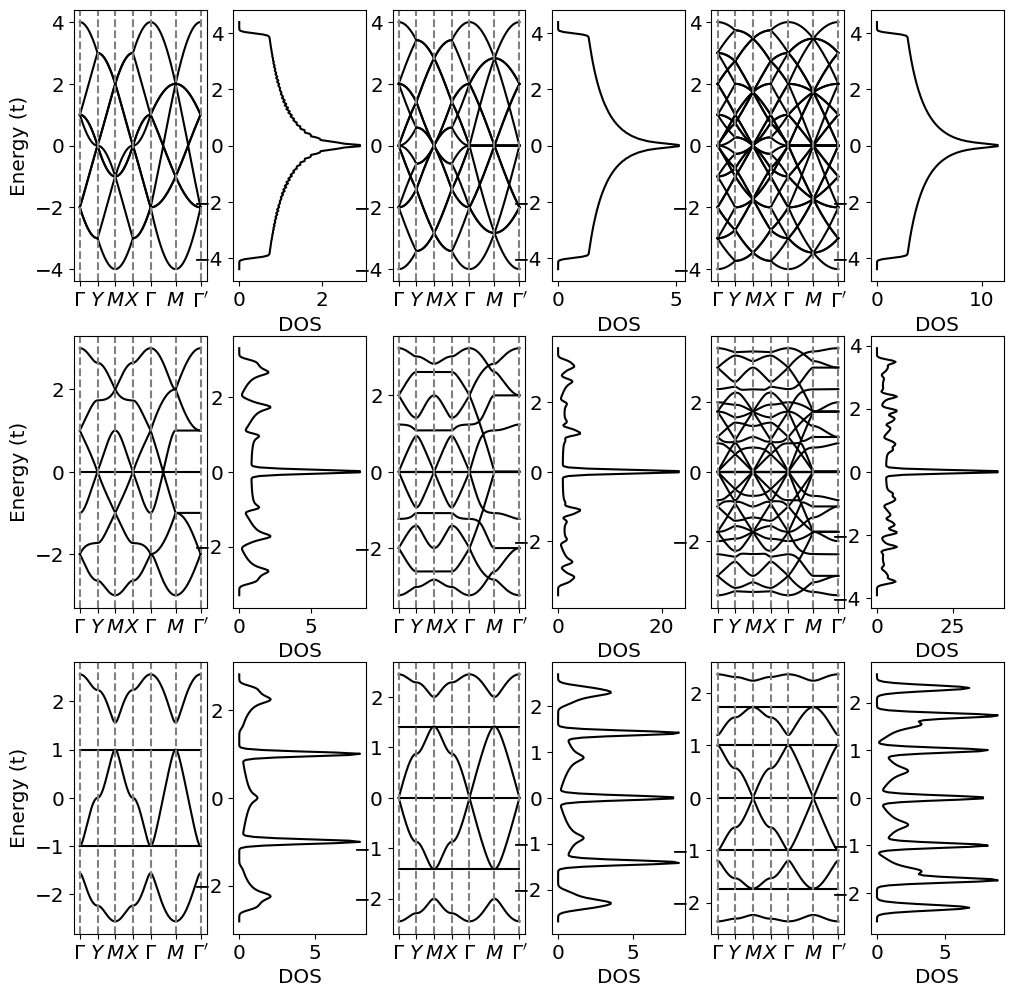

In [ ]:
# Runtime: ~2 minutes

import numpy as np
import matplotlib.pyplot as plt

from importlib import reload
from tblib import hamiltonian, plotting
reload(hamiltonian)
reload(plotting)

# Define model size
N = 3

# Create model instances
models_3 = [
    hamiltonian.DSLmodel(N=3),
    hamiltonian.dDSLmodel(N=3),
    hamiltonian.LiebNmodel(N=3),
    ]

models_4 = [
    hamiltonian.DSLmodel(N=4),
    hamiltonian.dDSLmodel(N=4),
    hamiltonian.LiebNmodel(N=4),
    ]

models_6 = [
    hamiltonian.DSLmodel(N=6),
    hamiltonian.dDSLmodel(N=6),
    hamiltonian.LiebNmodel(N=6),
    ]

# Define Figure
fig, axes = plt.subplots(len(models_3),6,figsize=(12,4*len(models_3)))

nk_dos = 30

for i, model in enumerate(models_3):
    N = 3
    H0 = models_3[i].get_H0()
    axes[i, 0] = plotting.plot_bands(H0, s=(N,N), nk=500, hsp_path='GYMXGMH', ax=axes[i, 0]);
    axes[i, 1] = plotting.plot_DOS(H0, nk=nk_dos, s=(N,N), elim=axes[i, 0].get_ylim(), ax=axes[i, 1], ylabel=None);

for i, model in enumerate(models_4):
    N = 4
    H0 = models_4[i].get_H0()
    axes[i, 2] = plotting.plot_bands(H0, s=(N,N), nk=500, hsp_path='GYMXGMH', ax=axes[i, 2], ylabel=None);
    axes[i, 3] = plotting.plot_DOS(H0, nk=nk_dos, s=(N,N), elim=axes[i, 2].get_ylim(), ax=axes[i, 3], ylabel=None);

for i, model in enumerate(models_6):
    N = 6
    H0 = models_6[i].get_H0()
    axes[i, 4] = plotting.plot_bands(H0, s=(N,N), nk=500, hsp_path='GYMXGMH', ax=axes[i, 4], ylabel=None);
    axes[i, 5] = plotting.plot_DOS(H0, nk=nk_dos, s=(N,N), elim=axes[i, 4].get_ylim(), ax=axes[i, 5], ylabel=None);